In [1]:
'''
    File name: Exam.ipynb
    Author: Gabriel Moreira
    Date last modified: 14/10/2018
    Python Version: 3.6.5
'''
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import t
from matplotlib import gridspec
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.linear_model import LogisticRegression

%config IPCompleter.greedy=True

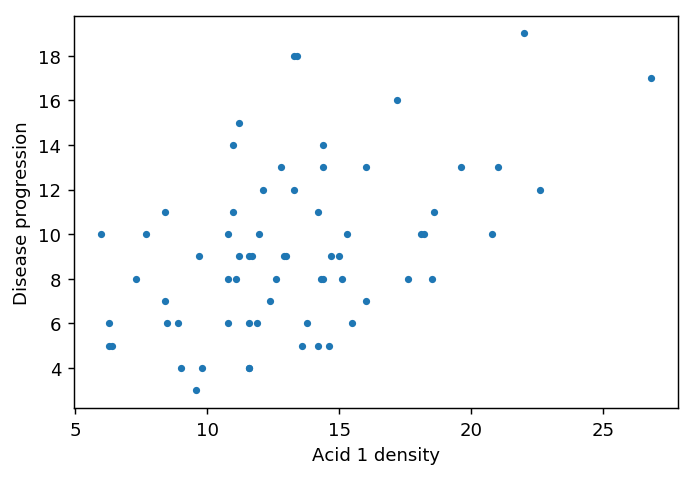

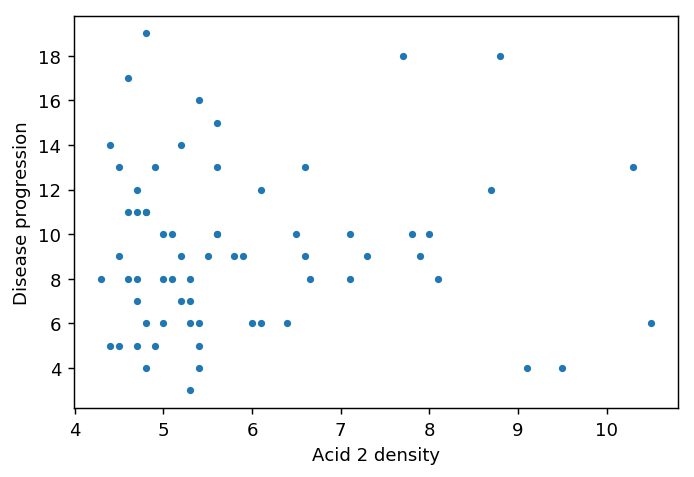

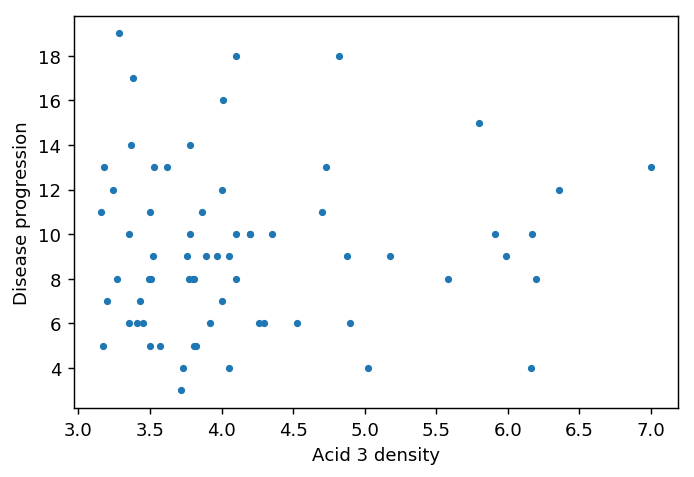

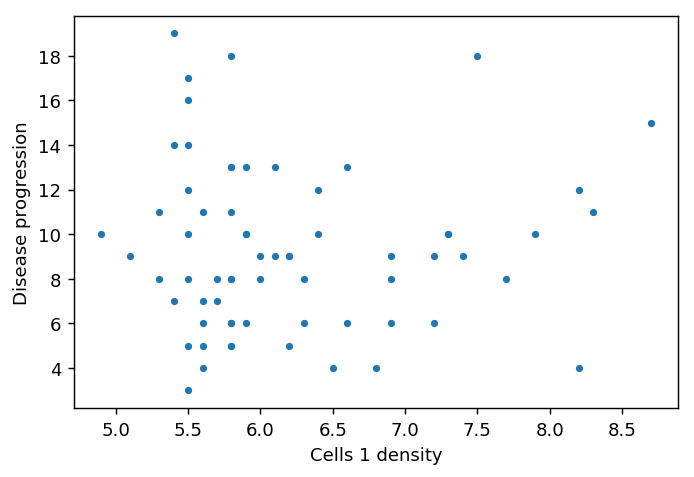

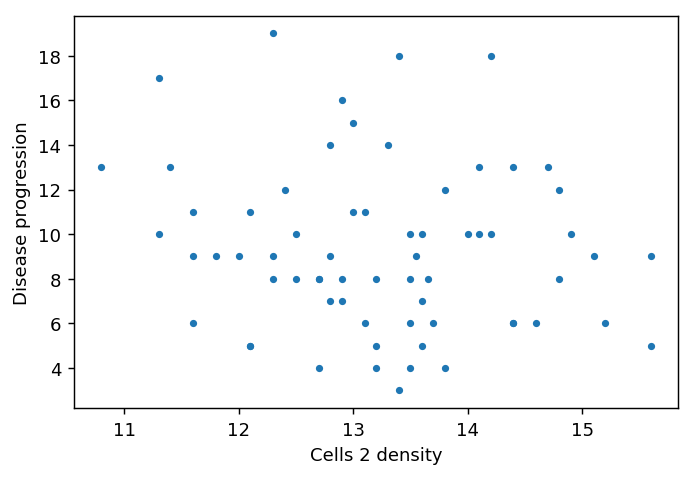

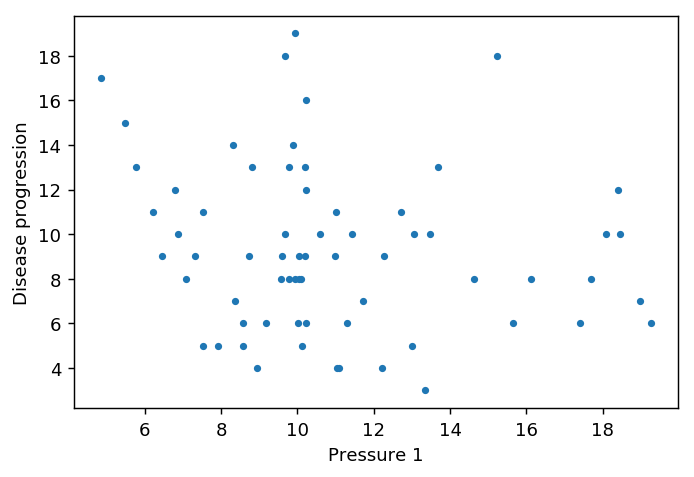

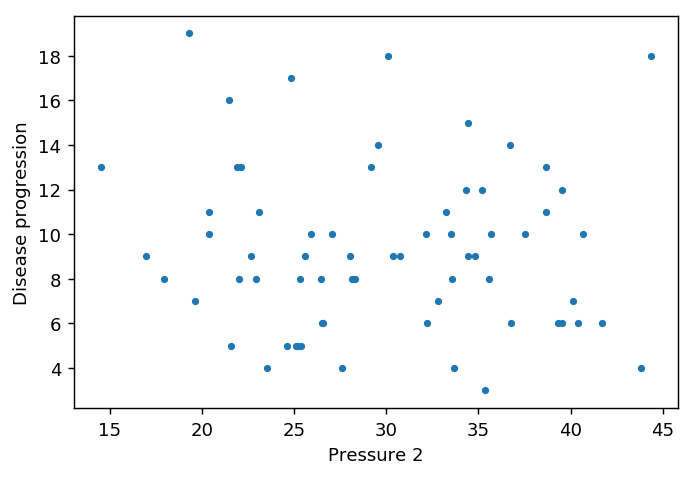

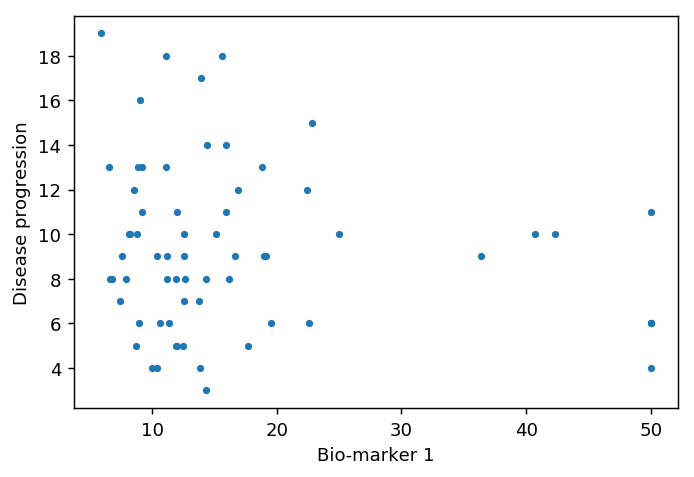

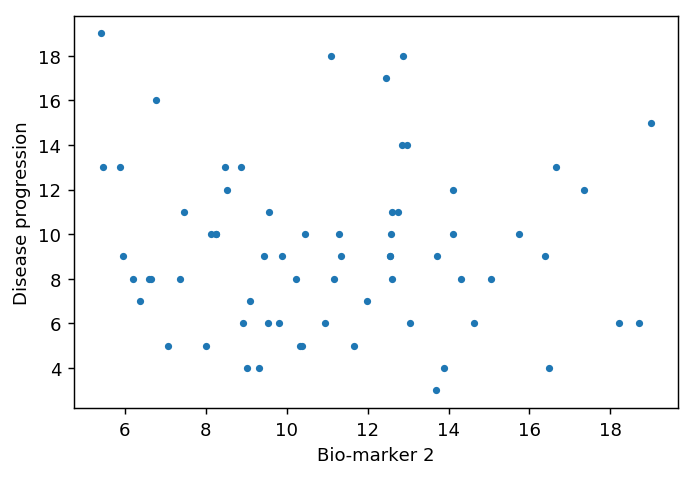

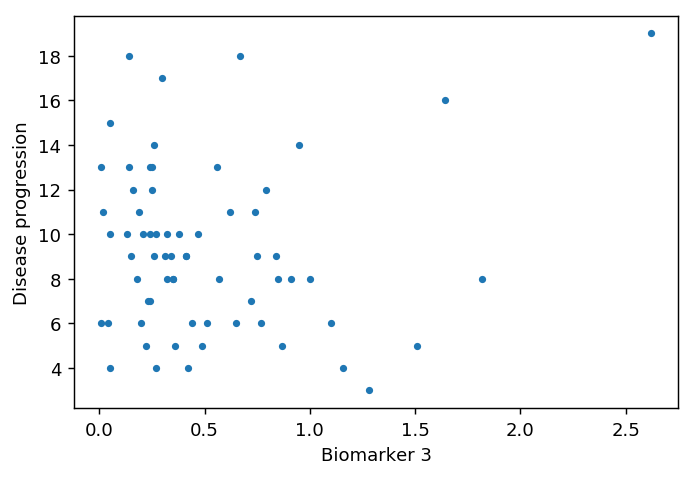

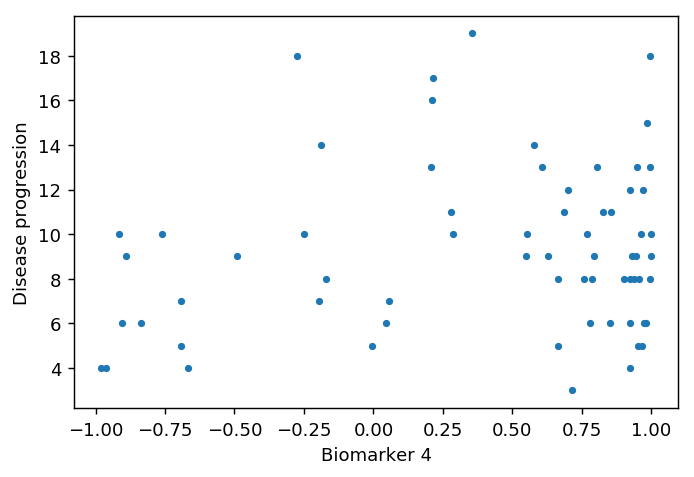

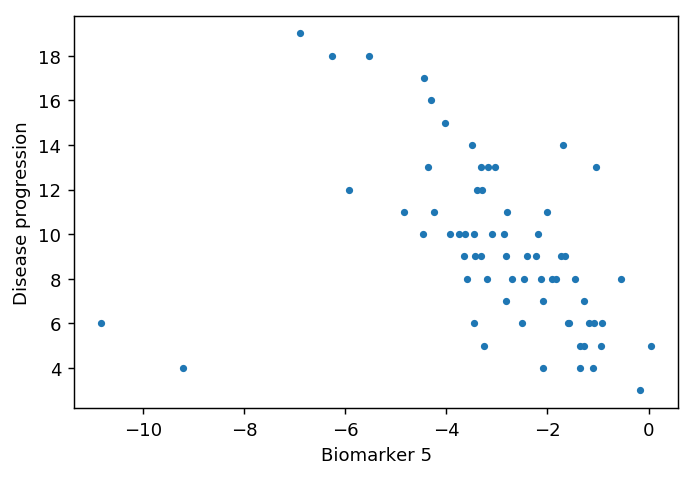

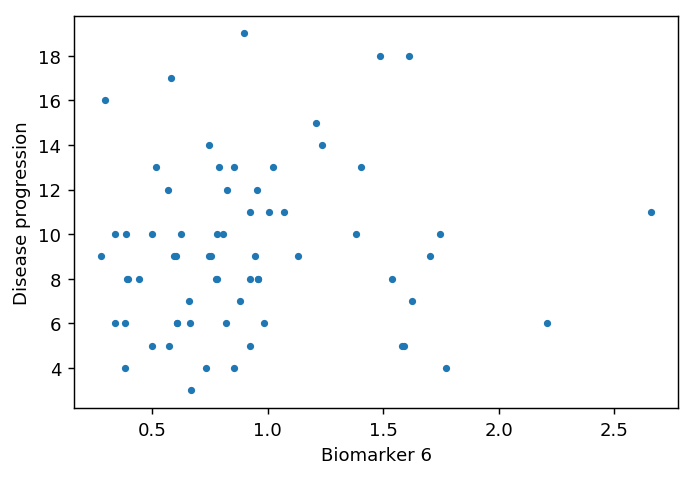

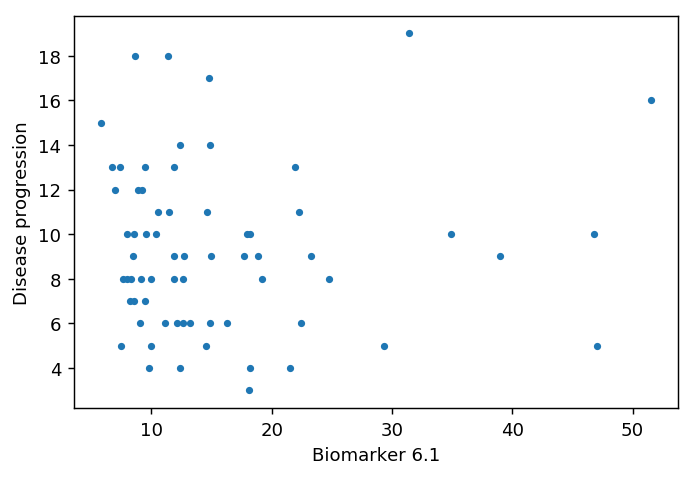

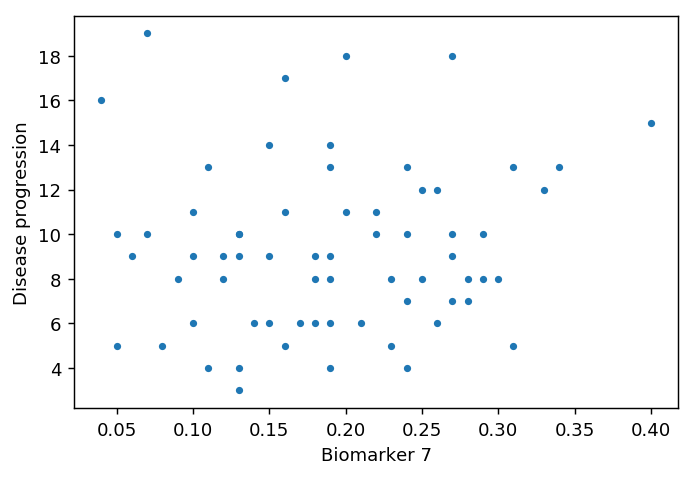

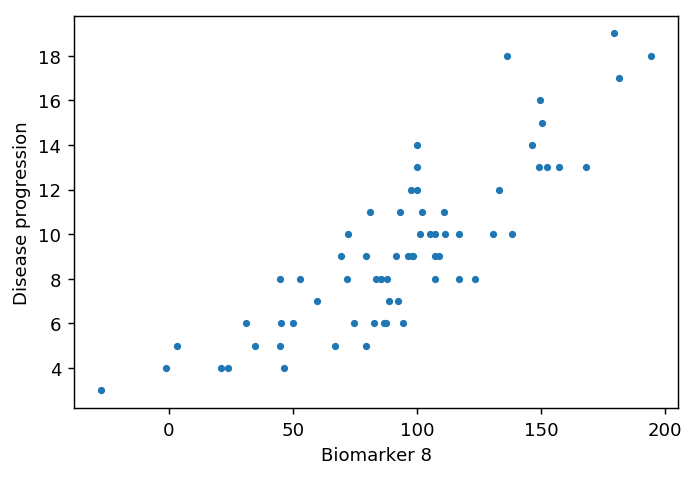

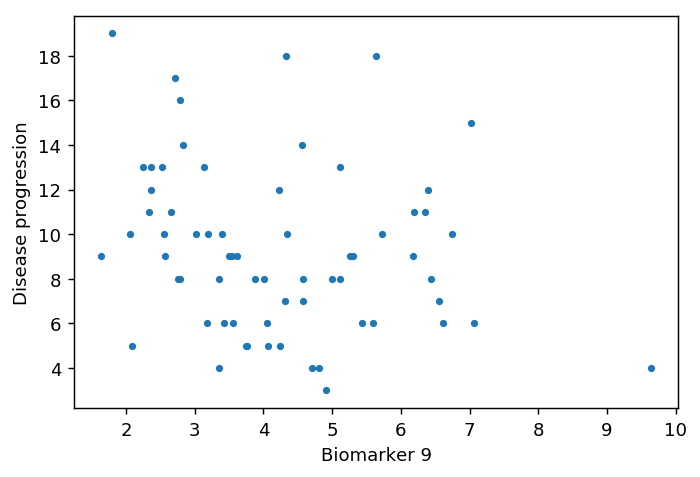

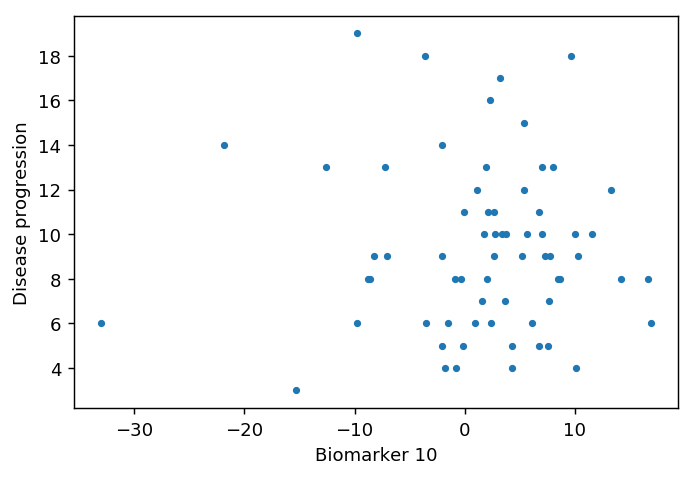

In [2]:
#1) LECTURE, EXTRACTION ET VISUALISATION DES DONNEES

plt.rcParams['figure.dpi'] = 130
dataframe=pandas.read_csv("./MedicalData1.csv",sep=';',decimal=b',')

listColNames=list(dataframe.columns)

XY=dataframe.values
ColNb_Y=listColNames.index('Disease progression')

Y=XY[:,ColNb_Y].reshape((XY.shape[0],1))   #reshape is to make sure that Y is a column vector
X = np.delete(XY, ColNb_Y, 1)

X_scaled = preprocessing.scale(X)

[n_lines, n_col] = X.shape

listColNames.pop(ColNb_Y)     #to make it contains the column names of X only

for Col in range(len(listColNames)):
    plt.plot(X[:,Col],Y[:],'.')
    plt.xlabel(listColNames[Col])
    plt.ylabel('Disease progression')
    plt.show()

## Question 1:

Observez les donnees unes par unes. Est-ce que vous identifiez visuellement des liens entre certaines variables et la variable 'Disease progression'. Si oui, lesquels ?

<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> Les variables 'Biomarker 5' et 'Biomarker 8' présentent une rélation avec le variable 'Disease Progression' qui semble lineaire. Le premier semble avoir une corrélation negative avec 'Disease Progression', tandis que le dernier doit avoir une forte corrélation positive. La variable 'Acid 1 Density' doit avoir aussi une corrélation positive, mais pas si grande que celle de 'Biomarker 8'.

</div>

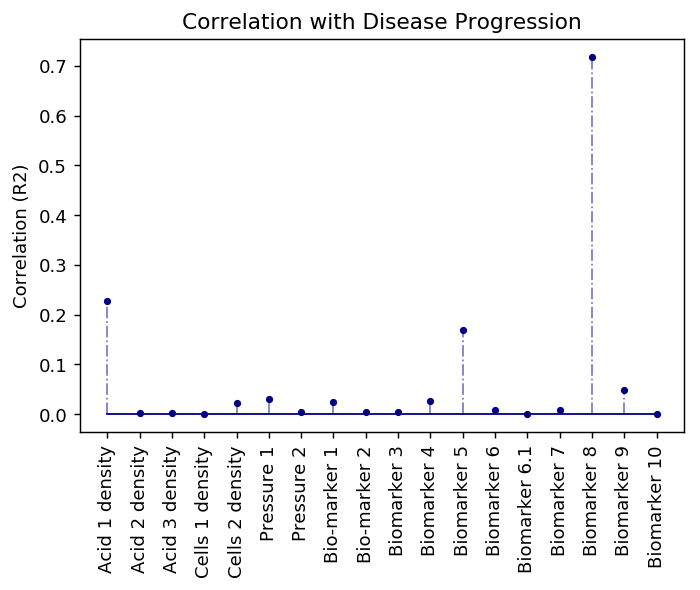

In [3]:
"""
    Correlations between th 18 variables 
    and Disease Progression
"""
R2 = []
lr = LinearRegression()
for Col in range(X.shape[1]):
    x = X[:,Col].reshape(XY.shape[0], 1)
    lr.fit(x,Y)
    R2.append(lr.score(x,Y))
    
markerline, stemlines, baseline = plt.stem(np.array([i for i in range(n_col)]), np.array(R2), '-.')
plt.xticks(np.arange(len(listColNames)), listColNames, rotation='vertical');
plt.ylabel('Correlation (R2)')
plt.title('Correlation with Disease Progression')
plt.setp(baseline, 'color', 'navy', 'linewidth', 1)
plt.setp(stemlines, 'color', 'navy', 'linewidth', 1, 'alpha', 0.5);
plt.setp(markerline, 'color', 'navy', 'markersize', 3, 'linewidth', 1);

## Question 2 :   
On se demande si il est possible de predire le niveau de 'Disease progression' à partir de de la variable 'Acid 1 density'.

## Question 2.1 : 
Effectuez une regression lineaire simple entre ces deux variables et predisez ensuite les valeurs de 'Disease progression' a l'aide de 'Acid 1 density'. Vous pourrez evaluer la qualité des predictions a l'aide du coefficient de determination R2.

In [4]:
Acid1DenIndex = listColNames.index('Acid 1 density')
Acid1Den = X[:,Acid1DenIndex].reshape(XY.shape[0], 1)
lr.fit(Acid1Den, Y[:])

print('> R2 DiseaseProgression(Acid1Density) = ' + str(round(lr.score(Acid1Den, Y[:]),4)))

> R2 DiseaseProgression(Acid1Density) = 0.2276


<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> Correlation coefficient semble justifier partiellement la progression. Seulement 23% de la variabilité de 'Disease Progression' ne sont pas expliqués par 'Acid 1 Density'.
</div>

## Question 2.2 : 
Evaluez la stabilite des predictions a l'aide d'une methode de validation croisee de type 4-folds.


<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> Pour déterminer la stabilité des predictions, je présente ci-dessous le eSplit pour chaque fold, calculé comme suit:
$$ $$
\begin{equation}
    e_{split} = \frac{1}{n-n_1}\sum_{i = n_1 + 1}^{n}\vert Y_i-\hat Y_i\vert
\end{equation}
$$ $$
La valeur oscille autour de 2.59.
</div>

K-FOLDS (k=4) and linear regression for Disease Progression ~ Acid 1 Density

> Mean eSplit = 2.59
> Std Variation (b1) = 0.05


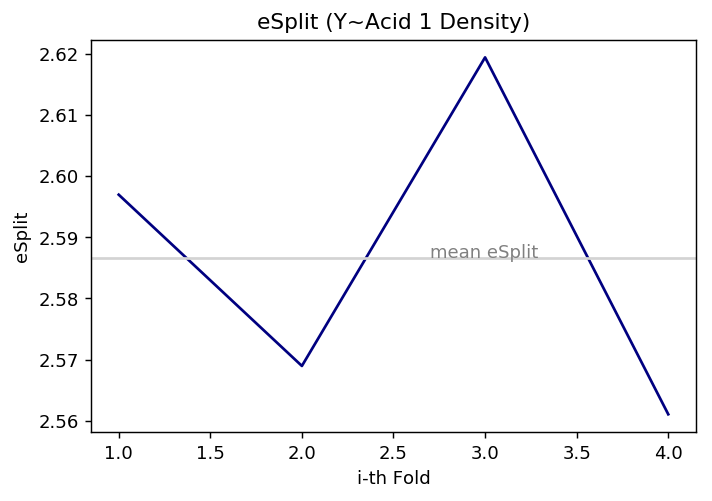

In [5]:
kf = KFold(n_splits=4)
eSplit = np.zeros(4)
b0 = np.zeros(4)
b1 = np.zeros(4) 
i = 0

for train, test in kf.split(Acid1Den):
    lr.fit(Acid1Den[train], Y[train])
    eSplit[i] = np.mean(abs(np.subtract(Y, lr.predict(Acid1Den))))
    b1[i] = lr.coef_
    b0[i] = lr.intercept_
    i += 1
    
plt.figure()
plt.plot([i for i in range(1,5)], eSplit, color='navy')
plt.title('eSplit (Y~Acid 1 Density)')
plt.xlabel('i-th Fold')
plt.ylabel('eSplit')
plt.axhline(np.mean(eSplit), color='lightgray')
plt.text(2.7, np.mean(eSplit), 'mean eSplit', color='gray')

print('K-FOLDS (k=4) and linear regression for Disease Progression ~ Acid 1 Density\n')
print('> Mean eSplit = %.2f' % round(np.mean(eSplit),2))
print('> Std Variation (b1) = %.2f' % round(np.sqrt(np.var(b1)),2));

## Question 2.3 : 
Auriez-vous eu de meilleurs resultats en predisant 'Disease progression' a l'aide de la variable 'Biomarker 8' ou 'Pressure 1'?


<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> La variable 'Biomarker 8' a aussi une corrélation très forte et positive avec 'Disease Progression'. Toutefois 'Pressure 1' ne semble pas une bonne variable préditive. En effet, le coefficient de corrélation est en-dessous de 5%, avec un eSplit supérieur à celui de 'Biomarker 8'.
</div>

> R2 Progression(Biomarker 8) =  0.7175
> Mean eSplit = 1.57
> Std Variation (b1) = 0.0022

> R2 Progression(Pressure 1) =  0.0305
> Mean eSplit = 2.89
> Std Variation (b1) = 0.10


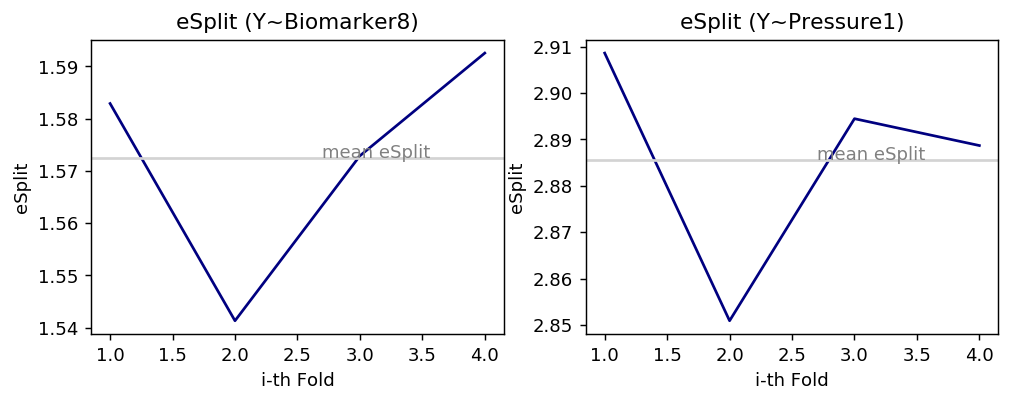

In [6]:
"""
    Uses K-folds with K=4 and a linear regression on 
    Biomarker 8 and Disease Progression.
    Prints the R2, Mean eSplit and the std_var(b1).
    Plots the eSplit for each fold.
"""

Biomarker8 = X[:,listColNames.index('Biomarker 8')].reshape([len(Y),1])
lr.fit(Biomarker8[:], Y[:])
print('> R2 Progression(Biomarker 8) = ', str(round(lr.score(Biomarker8[:], Y[:]),4)))
      
i = 0
for train, test in kf.split(Biomarker8):
    lr.fit(Biomarker8[train], Y[train])
    b0[i] = lr.intercept_
    b1[i] = lr.coef_
    eSplit[i] = np.mean(abs(np.subtract(Y, lr.predict(Biomarker8))))
    i += 1
    
fig = plt.figure(figsize=(9, 3)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

ax0.plot([i for i in range(1,5)], eSplit, color='navy')
ax0.set_title('eSplit (Y~Biomarker8)')
ax0.set_xlabel('i-th Fold')
ax0.set_ylabel('eSplit')
ax0.axhline(np.mean(eSplit), color='lightgray')
ax0.text(2.7, np.mean(eSplit), 'mean eSplit', color='gray')

print('> Mean eSplit = %.2f' % round(np.mean(eSplit),4))
print('> Std Variation (b1) = %.4f\n' % round(np.sqrt(np.var(b1)),4))


"""
    Uses K-folds with K=4 and a linear regression on 
    Pressure1 and Disease Progression.
    Prints the R2, Mean eSplit and the std_var(b1)
    Plots the eSplit for each fold
"""

Pressure1 = X[:,listColNames.index('Pressure 1')].reshape([len(Y),1])
lr.fit(Pressure1[:], Y[:])
print('> R2 Progression(Pressure 1) = ', str(round(lr.score(Pressure1[:], Y[:]),4)))

i = 0
for train, test in kf.split(Pressure1):
    lr.fit(Pressure1[train], Y[train])
    b0[i] = lr.intercept_
    b1[i] = lr.coef_
    eSplit[i] = np.mean(abs(np.subtract(Y, lr.predict(Pressure1))))
    i += 1


ax1.plot([i for i in range(1,5)], eSplit, color='navy')
ax1.set_title('eSplit (Y~Pressure1)')
ax1.set_label('i-th Fold')
ax1.set_ylabel('eSplit')
ax1.set_xlabel('i-th Fold')
ax1.axhline(np.mean(eSplit), color='lightgray')
ax1.text(2.7, np.mean(eSplit), 'mean eSplit', color='gray')

print('> Mean eSplit = %.2f' % round(np.mean(eSplit),4))
print('> Std Variation (b1) = %.2f' % round(np.sqrt(np.var(b1)),4))

<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> Parmi les variables 'Pressure 1', 'Acid 1 Density' et 'Biomarker 8', la dernière a l'eSplit inférieur, ce qui signifie que les valeurs pŕedites pour elle, $\hat Y$, s'approchent les plus (en moyenne) des valeurs de test. Une valeur élevée de eSplit peut signifier qu'il y'a un overfit ou underfit. Toutefois, on a utilisé le même modèle pour les trois variables (linéaire), donc les valeus plus élevés de eSplit correspondent aux variables qui ne sont pas très corrélées avec Y. Par ailleurs, même si 4 folds n'est pas suffisant pour assurer la stabilité des prédictions, les valures semblent stables, car elles oscillent autour d'une valeur moyenne.
</div>

## Question 2.4 : 
Peut-on enfin dire si on observe une relation significative entre 'Disease progression' et (independament) 'Acid 1 density' ou 'Biomarker 8' ou 'Pressure 1'. On peut le valider en testant si les coefficients des pentes obtenues entre 'Disease progression' et chacune de ses trois variables par regression lineaire simples sont significativement differentes de 0.



<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> 
On va d'abord supposer que les variables ont une rélation linéaire entre elles, définie par:
$$ $$
\begin{equation}
Y = \beta_0 + \beta_1 X
\end{equation}
$$ $$

Y et X auront une rélation linéaire si $\beta_1 \neq 0$. Donc notre hypothèse va être, pour chaque test:
$$ $$
\begin{equation}
\text{H0: } \beta_1 = 0
\end{equation}
$$ $$ 

Il y'aura donc une rélation linéaire si l'on peut rejeter l'hypothèse H0 avec une petite erreur de se tromper. On va admettre cette erreur égale à 5%.

Les tests statistiques ci-dessous montrent que, en effet, on peut rejeter l'hypothèse que 'Acid 1 density' et 'Biomarker 8' n'ont pas une rélation significative avec 'Disease Progression'. Cependant, on ne peut pas rejeter l'hypothèse que 'Pressure 1' n'influence pas 'Disease Progression', avec un risque se de tromper de 5%. Les p-values pour ces tests sont présentés aussi.


$$ $$
Pour la statistique de test:
\begin{equation}
\frac{b_1-\beta_1}{s\big(\frac{1}{(n-1)s_x^2}\big)^2}\sim{t_{(n-2)}}
\end{equation}
$$ $$
Donc, si l'on admette H0, $\beta_1 = 0$:
$$ $$
\begin{equation}
\frac{b_1}{s\big(\frac{1}{(n-1)s_x^2}\big)^2}\sim{t_{(n-2)}}
\end{equation}
$$ $$
L'interval de confiance à 100% - $\alpha$ est:
$$ $$
\begin{equation}
\big[-t^{-1}_{n-2}(\alpha/2),t^{-1}_{n-2}(\alpha/2)\big]
\end{equation}
$$ $$
On peut remarquer aussi le fait que la p-value de l'hypothèse faite à 'Biomarker 8' est d'une ordre de grandeur vraiment petite ($1^{-19}$), ce que montre la rélation linéaire entre cette variable et Y.
</div>

In [7]:
""" 
    This section has the functions used in the statistic t-test.
"""

def ss(x, y):
    """ 
        Calculates the residual variance.
    """
    n = len(x)
    lr.fit(x[:], y[:])
    x = x.reshape([n,1])
    y = y.reshape([n,1])
    s = np.sqrt(np.sum(np.power(np.subtract(y, lr.predict(x)), 2)) / (n-2))
    return s

def sx2(x):
    """ 
        Calculates the variance of the variable X, diving by (n-2) 
        instead of n.
    """
    n = len(x)
    x = x.reshape([n,1])
    sx2 = (1.0/(n-2))*np.sum(np.power(np.subtract(x, np.array([np.mean(x)]*n).reshape([n,1])),2))
    return sx2

def testStat(x,y, alpha):
    """ 
        Computes a statistical test on the hypothesis that Beta-1 is zero.
        Type-I error being equal to alpha.
    """
    n = len(x)
    x = x.reshape([n,1])
    y = y.reshape([n,1])
    lr.fit(x[:], y[:])
    b1 = lr.coef_
    interval = ss(x, y)*np.sqrt((1.0/((n-1)*sx2(x))))*t.ppf(1-alpha/2.0, n-2)
    pvalue = t.sf(abs(b1 / (ss(x, y)*np.sqrt(1/((n-1)*sx2(x))))), n-2)
    print('> H0: Beta1 = 0. Type-I error (alpha) = %.2f.' % alpha)
    print('> p-value = %.4E.' % pvalue)
    print('> b1 = %.5f.' % b1[0])
    print('> Confidence interval (%.f percent) = [%.5f, +%.5f].' % (100-alpha*100, 
          -interval, interval))
    if pvalue < alpha:
        print('> H0 rejected. We can assume Beta-1 is different than 0.')
    else:
        print('> We cannot reject H0.')

In [8]:
""" 
    t-tests with confidence intervals and p-values to determine 
    whether or not we can reject the null hypothesis (H0).
    H0: The slope (Beta1) is null - there is no significative relationship.
"""

print('Biomarker 8:')
testStat(Biomarker8, Y, 0.05)
print('\nPressure 1:')
testStat(Pressure1, Y, 0.05)
print('\nAcid 1 Density:')
testStat(Acid1Den, Y, 0.05)

Biomarker 8:
> H0: Beta1 = 0. Type-I error (alpha) = 0.05.
> p-value = 1.1045E-19.
> b1 = 0.07089.
> Confidence interval (95 percent) = [-0.01102, +0.01102].
> H0 rejected. We can assume Beta-1 is different than 0.

Pressure 1:
> H0: Beta1 = 0. Type-I error (alpha) = 0.05.
> p-value = 7.8963E-02.
> b1 = -0.18557.
> Confidence interval (95 percent) = [-0.25947, +0.25947].
> We cannot reject H0.

Acid 1 Density:
> H0: Beta1 = 0. Type-I error (alpha) = 0.05.
> p-value = 2.2777E-05.
> b1 = 0.42035.
> Confidence interval (95 percent) = [-0.19190, +0.19190].
> H0 rejected. We can assume Beta-1 is different than 0.


## Question 3 :   
On s'interesse maintenant au lien entre la variable 'Disease progression' et 'Biomarker 5'. On peut remarquer que ces donnees contiennent deux valeurs aberrantes.


## Question 3.1 : 
Quelles sont les valeurs aberrantes et quel va etre leur impact lors de l'estimation d'une relation lineaire entre ces deux variables ?


<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> 
D'après le plot 'Disease Progression'~'Biomarker 5', et en regardant la répresentation graphique de la diagonal de la matrice H (voir en dessous), on constate que les outliers doivent être les deux valeurs de la variable 'Biomarker 5' en dessous de -8. Leur impact va être de  modifier les paramètres du modèle lineaire entre les deux variables, et de rendre ainsi pires les prédictions.
 
</div>

In [9]:
def hii(x):
    """ 
        Calculates the for the diagonal H matrix.
        Ŷ = HY
    """
    n = len(x)
    x = x.reshape([n,1])
    x_mean = np.array([np.mean(x)]*n)
    num = np.matmul(np.subtract(x.reshape([n,1]), x_mean.reshape(n,1)), 
                    np.subtract(x.reshape([1,n]), x_mean.reshape(1,n)))
    den = np.sum(np.square(np.subtract(x, x_mean)))
    h = np.array([1/n]*n**2).reshape(n,n) + np.divide(num,den)
    h_diag = np.diagonal(h)
    return h_diag

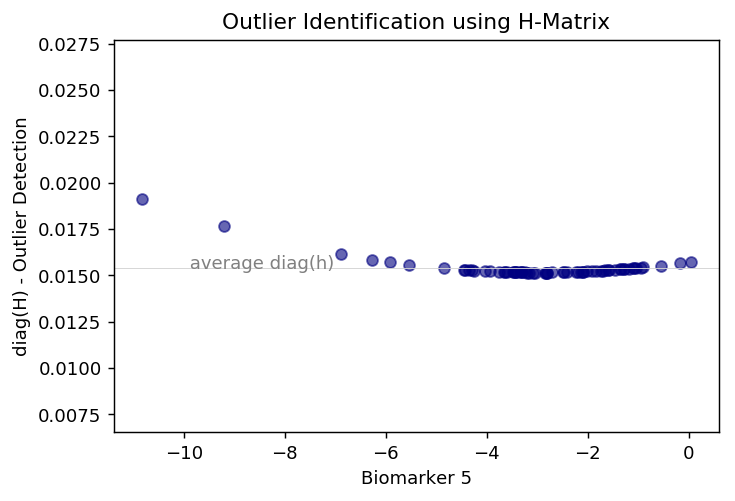

In [10]:
Biomarker5 = np.array(X[:,listColNames.index('Biomarker 5')])
n = len(Biomarker5)
Biomarker5 = Biomarker5.reshape([n ,1])

h_diag = hii(Biomarker5)
plt.figure()
plt.axhline(np.mean(h_diag), color='lightgray', linewidth=0.5)
plt.text(-10, np.mean(h_diag), ' average diag(h)', color='gray')
plt.scatter(Biomarker5, h_diag, alpha=0.6, color='navy')
plt.title('Outlier Identification using H-Matrix')
plt.xlabel('Biomarker 5')
plt.ylabel('diag(H) - Outlier Detection');

## Question 3.2 : 
Definissez une procedure de detection automatique de ces variables basee sur la distance de Cook.


In [11]:
""" 
    Functions used in calculation of the 
    Cooks Distance and to find the outliers.
"""

def residue(x,y):
    """ 
        Calculates the residues vector resultant from 
        a linear model being fitted to the pairs (x,y).
    """
    n = len(x)
    x = x.reshape(n, 1)
    y = y.reshape(n, 1)
    lr.fit(x,y)
    res = np.subtract(y, lr.predict(x))
    
    return res


def res_i(x,y):
    """ 
        Calculates the standardised residues vector resultant 
        from a linear model being fitted to the pairs (x,y).
    """
    n = len(x)
    x = x.reshape([n,1])
    y = y.reshape([n,1])
    num = residue(x,y)
    den = np.multiply(ss(x,y), np.sqrt(np.subtract(np.ones(n), hii(x))))
    res_std = np.divide(num.reshape([n,1]), den.reshape([n,1]))
    
    return res_std


def cook(x, y):
    """ 
        Calculates the cook's distances.
    """
    n = len(x)
    x = x.reshape([n,1])
    y = y.reshape([n,1])
    num = hii(x)
    den = np.multiply(np.ones(n)*2, np.subtract(np.ones(n), hii(x)))
    cook = np.multiply(np.divide(num,den).reshape([n,1]), np.square(res_i(x,y)))
    
    return cook


def outlierFinder(x, y):
    """ 
        Determines the outliers in a dataset, using the cook's distance
        and a cutoff criterion of 4/n.
        Nominal_cook is the array containing the data not classified as
        outliers.
        <...>_ind are the indexes for the outliers and the nominal data. 
    """  
    n = len(x)
    cookd = cook(x,y)
    nominal_cook = cookd[np.where(cookd <= 4/n)]
    outliers_cook = cookd[np.where(cookd > 4/n)]
    nominal_ind = np.where(cookd <= 4/n)
    outlier_ind = np.where(cookd > 4/n) 
    
    return [nominal_cook, outliers_cook, nominal_ind, outlier_ind]

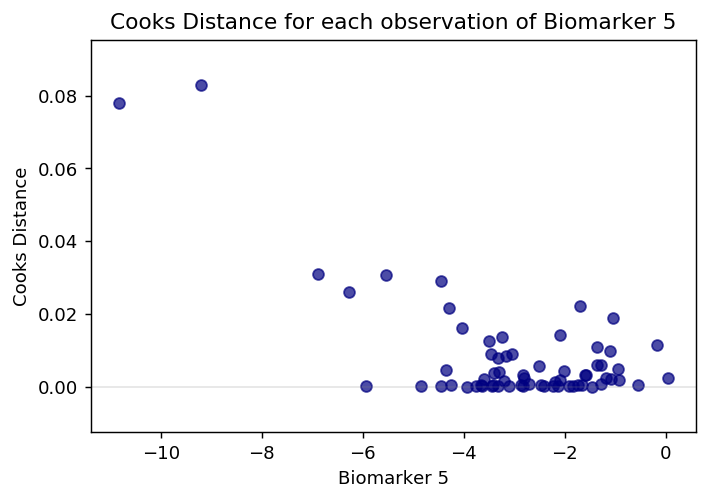

In [12]:
y = cook(Biomarker5, Y)

plt.figure()
plt.axhline(y=0, color='gray', linewidth=0.2)
plt.scatter(Biomarker5, cook(Biomarker5, Y), color='navy', alpha=0.7)
plt.title('Cooks Distance for each observation of Biomarker 5')
plt.xlabel('Biomarker 5')
plt.ylabel('Cook''s Distance');

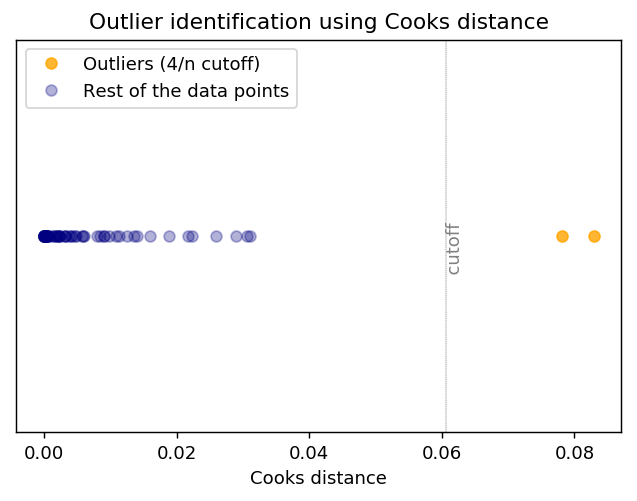

In [13]:
""" 
    Represents, graphically, the outliers and the rest of the
    data in different colors and for their Cooks distance.
    Uses a cutoff of 4/n.
"""

[nominal_cook, outliers_cook, nominal_ind, outliers_ind] = outlierFinder(Biomarker5, Y)
plt.figure()
plt.plot(outliers_cook,np.zeros_like(outliers_cook), 'o', color='orange', alpha=0.8)
plt.plot(nominal_cook,np.zeros_like(nominal_cook), 'o', color='navy', alpha=0.3)
plt.title('Outlier identification using Cooks distance')
plt.xlabel('Cook''s distance')
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
plt.legend(['Outliers (4/n cutoff)', 'Rest of the data points', ])
plt.axvline(x=4/n, linewidth=0.2, color='black', linestyle='--')
plt.text(4/n,0, '  cutoff', color='gray', rotation='vertical');

## Question 3.3 : 
Pourriez vous plus simplement detecter ces observations aberrantes a l'aide des residus ? Si oui, decrivez comment, sans necessairement coder la solution.


<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> 
Je présente dans la réponse à question 3.4 les répresentations graphiques des résidus standardisés avec et sans données aberrantes (representées à jaune). On constante que c'est possible d'utiliser un seuil pour les identifier. Toutefois, la distance de Cook reste le meilleur critère car il permet une identification moins ambigüe. 
</div>

## Question 3.4 : 
Comment traiteriez-vous les donnees aberrantes dans le contexte de la regression lineaire entre 'Disease progression' et 'Biomarker 5' pour estimer un lien pertinent entre ces deux variables



<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> 
Ci-dessous je présente les regressions linéaires avec et sans les données aberrantes identifiées à l'aide des
distances de Cook. Pour utiliser le modèle 'corrigé', c'est-à-dire, le modèle nettoyé des outliers, il va falloir en parler avec le commandataire de l'étude pour savoir si l'on peut en effet les supprimer, ou s'il vaudra mieux rien faire et les garder car on ne connaît pas leurs origines ni leur signification médicale.
</div>


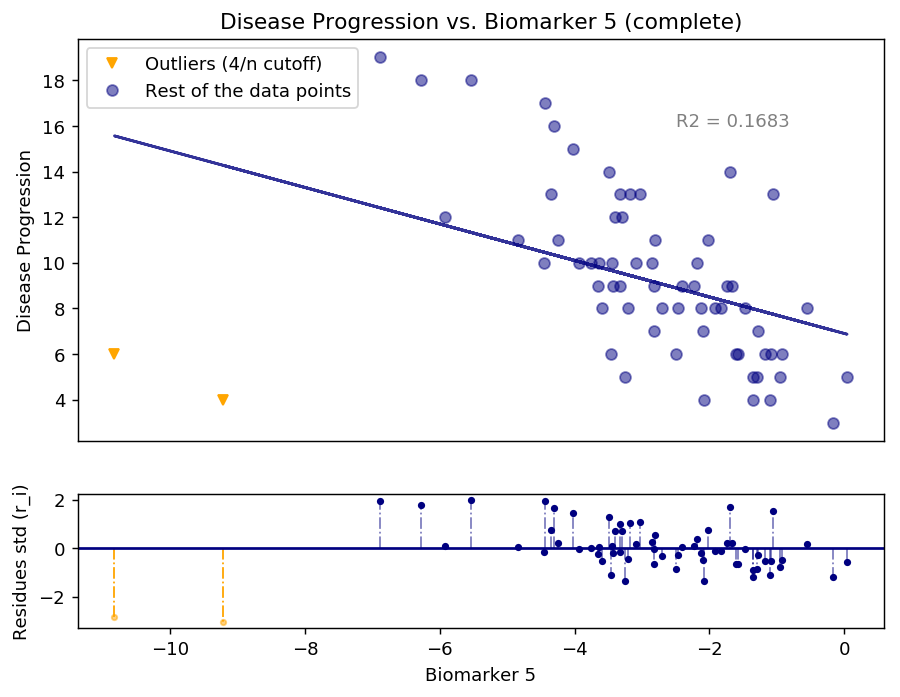

In [14]:
"""
    Linear regression between Disease Progression and Biomarker 5
    Uses Cook's distances to identify Outliers and color-mapping 
    to represent them differently.
    Also plots the standardised residues.
"""

# Linear Regression with the identified outliers present
lr.fit(Biomarker5, Y)
R2 = round(lr.score(Biomarker5, Y), 4)
text = 'R2 = ' + str(R2)

# Calculates the residues array
res = res_i(Biomarker5, Y)

# Divides the figure two represent the two plots
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

# Plots stuff - different colors for outliers and normal data
ax0.plot(Biomarker5[outliers_ind[0]], Y[outliers_ind[0]], 'v', color='orange')
ax0.plot(Biomarker5[nominal_ind[0]], Y[nominal_ind[0]], 'o', color='navy', alpha=0.5)
ax0.plot(Biomarker5, lr.predict(Biomarker5), color='navy', alpha=0.8)
ax0.set_title('Disease Progression vs. Biomarker 5 (complete)')
ax0.set_ylabel('Disease Progression')
ax0.legend(['Outliers (4/n cutoff)','Rest of the data points'], loc='upper left')
ax0.text(x=-2.5, y=16, s=text, color='gray')
ax0.xaxis.set_major_locator(plt.NullLocator())
ax0.xaxis.set_major_formatter(plt.NullFormatter())
markerline1, stemlines1, baseline1 = plt.stem(Biomarker5[outliers_ind[0]],res[outliers_ind[0]], '-.')
markerline2, stemlines2, baseline2 = plt.stem(Biomarker5[nominal_ind[0]],res[nominal_ind[0]], '-.')
ax1.set_xlabel('Biomarker 5')
ax1.set_ylabel('Residues std (r_i)')
plt.setp(baseline1, 'color', 'orange', 'linewidth', 0)
plt.setp(stemlines1, 'color', 'orange', 'linewidth', 1);
plt.setp(markerline1, 'color', 'orange', 'markersize', 3, 'linewidth', 1, 'alpha', 0.5);
plt.setp(baseline2, 'color', 'navy', 'linewidth', 0)
plt.setp(stemlines2, 'color', 'navy', 'linewidth', 1, 'alpha', 0.5);
plt.setp(markerline2, 'color', 'navy', 'markersize', 3, 'linewidth', 1);
plt.axhline(y=0, color='navy')

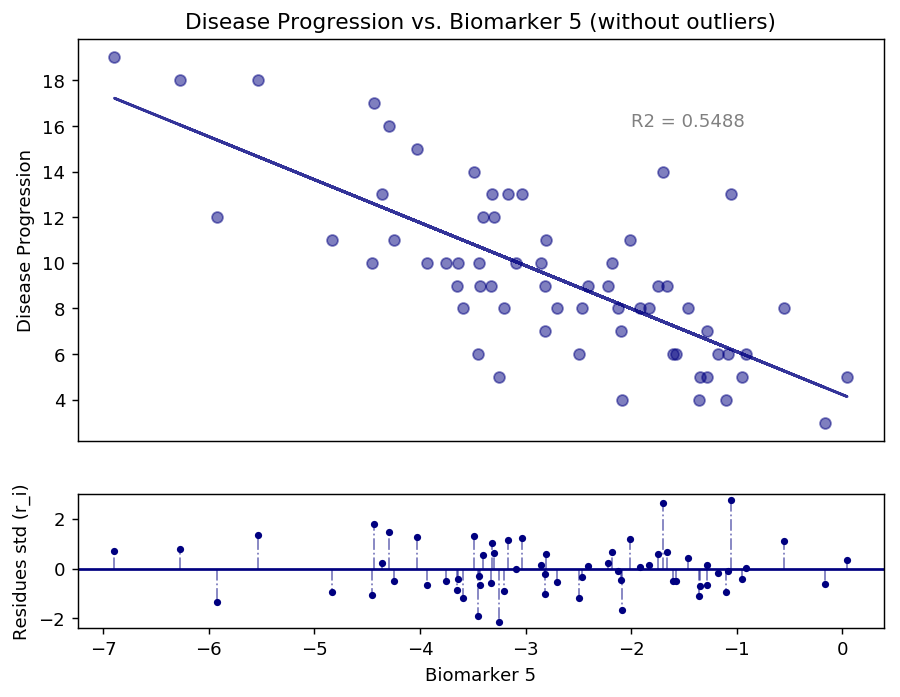

In [15]:
"""
    Linear regression between Disease Progression and Biomarker 5 without outliers.
    Uses Cook's distances to identify Outliers and color-mapping 
    to represent them differently.
    Also plots the standardised residues.
"""

# Remove the Outliers from the dataset
Biomarker5_clean = np.delete(Biomarker5, outliers_ind[0]).reshape([len(Biomarker5)-len(outliers_cook),1])
Y_clean = np.delete(Y, outliers_ind[0]).reshape([len(Y)-len(outliers_cook),1])

# Calculates the residues array
res = res_i(Biomarker5_clean, Y_clean)

# Linear regression performed on the clean dataset
lr.fit(Biomarker5_clean, Y_clean)
R2_clean = round(lr.score(Biomarker5_clean, Y_clean),4)
text = 'R2 = ' + str(R2_clean)

# Divides the figure two represent the two plots
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

# Plots stuff
ax0.set_title('Disease Progression vs. Biomarker 5 (without outliers)')
ax0.set_ylabel('Disease Progression')
ax0.text(x=-2, y=16, s=text, color='gray')
ax0.plot(Biomarker5_clean, lr.predict(Biomarker5_clean), color='navy', alpha=0.8)
ax0.plot(Biomarker5_clean, Y_clean, 'o', color='navy', alpha=0.5)
ax0.xaxis.set_major_locator(plt.NullLocator())
ax0.xaxis.set_major_formatter(plt.NullFormatter())
ax1.set_xlabel('Biomarker 5')
ax1.set_ylabel('Residues std (r_i)')
markerline, stemlines, baseline = plt.stem(Biomarker5_clean,res, '-.')
plt.setp(baseline, 'color', 'navy', 'linewidth', 0)
plt.setp(stemlines, 'color', 'navy', 'linewidth', 1, 'alpha', 0.5);
plt.setp(markerline, 'color', 'navy', 'markersize', 3, 'linewidth', 1);
plt.axhline(y=0, color='navy');

## Question 4 :   
Une fois les observations aberrantes de 'Biomarker 5' traitées, on souhaite sélectionner les variables de 'X' qui permettent de prédire au mieux 'Disease progression' a l'aide de la regression multiple regularisée.


## Question 4.1 : 
Expliquez pourquoi vous effecturez cette procedure sur 'X_scaled' plutot que 'X' ?

 

<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> 
Parce que sans faire une centrage et une réduction les variables qui ont des valeurs plus grandes auront aussi une influence plus grande (car leur variance est supérieure). Toutefois, cela ne signifie pas qu'elles permettent une prédiction de la variable 'Disease Progression' meilleure que les autres. Le 'scaling' permet d'enlever cet effet, et d'obtenier la vraie contribuition de chaque variable pour la prédiction de 'Disease Progression'.
</div>



## Question 4.2 : 
Expliquez pourquoi vous regulariserez les coefficients estimes avec une regularisation de type LASSO plutot que RIDGE ?

<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> 
Comme il nous est demandé de faire une sélection des variables, le méthode LASSO est le seul que permet de le faire (entre eux). La solution sera "sparse", car il y'aura des coefficients nuls, ce qui permet de faire donc la sélection des variables. Cela n'est pas possible en utilisant la méthode Ridge car il ne produce pas des coefficients nuls.
</div>

## Question 4.3 : 
Codez la procedure de selection des variables optimales en parametrant a la main le poids entre la qualite de prediction et le niveau de regularisation.

<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> 
Je présente ici une analyse sur l'effet du paramètre $\alpha$ du méthode LASSO dans le coefficient de corrélation et dans le nombre de variables sélectionnées. J'ai pris des valeurs de $\alpha$ reparties de 0.05 jusqu'à 0.55, puis j'ai fait un fit LASSO pour chacune de ces valeurs. Les résultats sont afichées graphiquement, ci-dessous:
</div>

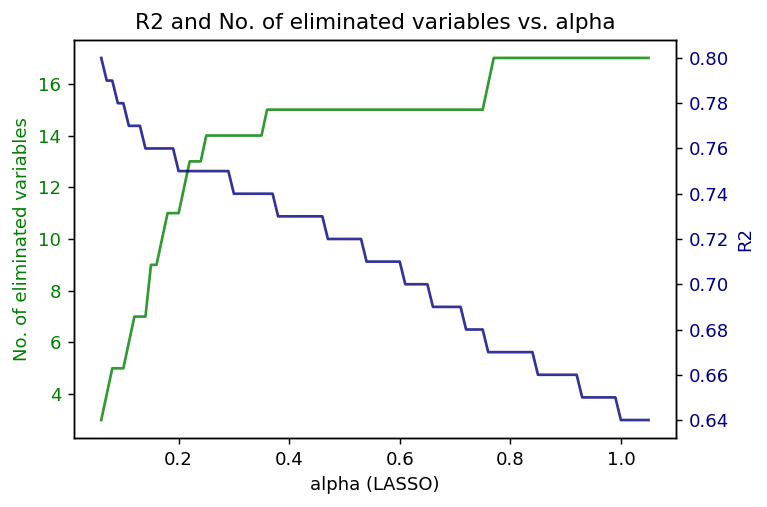

In [16]:
""" 
    Preliminary Study on the influence alpha has on the correlation 
    coefficient R2 and the number of selected / unselected variables, 
    i.e., number of null coefficients in the Beta vector.
"""

alpha = [0.05+0.01*i for i in range(1, 101)]
lassoR2 = []
NumEliminatedVars = []

for i in range(100):
    lassoReg = Lasso(alpha = alpha[i])
    lassoReg.fit(X_scaled, Y)
    lassoR2.append(round(lassoReg.score(X_scaled, Y), 2))
    NumEliminatedVars.append(np.size(np.where(lassoReg.coef_ == 0)))

# Plots more stuff
fig, ax1 = plt.subplots()
ax1.set_title('R2 and No. of eliminated variables vs. alpha')
ax1.set_xlabel('alpha (LASSO)')
ax1.set_ylabel('No. of eliminated variables', color='green')
ax1.plot(alpha, NumEliminatedVars, '-', alpha=0.8, color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax2 = ax1.twinx()  
ax2.set_ylabel('R2', color='navy')  
ax2.plot(alpha, lassoR2, '-', alpha=0.8, color='navy')
ax2.tick_params(axis='y', labelcolor='navy')
fig.tight_layout()  
plt.show()

<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> 
Le méthode $lassoVarSelect(X, Y, theta)$ permet de spécifier une valeur theta corréspondant à pourcentage du R2 (régression linéaire multiple) qui l'on veut obtenir avec LASSO, et le nombre de variables sélectionnées dans ce cas.
</div>

In [17]:
def lassoVarSelect(X, Y, theta):
    """
        Selects the variables using Lasso Regression and for a correlation
        coefficient of theta*R2(Linear Regression).
        Varies the alpha automatically and stops iterating once it reaches the
        desired R2 (Without using cross-validation).
    """
    
    # First a mulitple linear regression is performed to find the R2 max
    lr = LinearRegression()
    lr.fit(X,Y) 
    R2Goal = theta*lr.score(X,Y)   
    alpha = [0.05+0.01*i for i in range(1, 101)]
    
    # Increasing alpha until the R2 goal is achieved
    for i in range(100):
        lassoReg = Lasso(alpha = alpha[i])
        lassoReg.fit(X_scaled, Y)
        lassoR2 = lassoReg.score(X_scaled, Y)
        if  lassoR2 <= R2Goal:
            break
            
    return [lassoR2, lassoReg.coef_]

In [18]:
# Selecting variables with a R2 cutoff of 95% of the value for linear multiple regression

theta = 0.85 # Adjust here! (85% of the R2 for alpha = 0)

[R2, betaVector] = lassoVarSelect(X_scaled,Y,theta)
numSelectVar = np.size(np.where(betaVector != 0))

print('> R2 = %.4f' % round(R2,4))
print('> Number of selected variables: %d' % numSelectVar)

> R2 = 0.7017
> Number of selected variables: 3


<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> 
Donc, pour un R2 égal à 95% de la valeur l'on avait pour une régression linéaire multiple (sans pénalisations), on a  une sélection de 3 variables, c-à-d, 18-3 = 15 coefficients nuls dans le vecteur $\beta$.
</div>

## Question 4.4 : 
Codez la procedure automatique de parametrisation de ce poids, de sorte a ce q'un maximum de trois variables soit typiquement selectionne et que la qualite de prediction soit optimale. Une procédure de validation croisee de type leave-one-out sera idealement utilisee. La selection des variables est-elle stable ?


In [19]:
def optimizeSelection(X,Y, alpha, method):
    """
        Method can be linear or log for logistic regression
        Uses Leave-one-out and Lasso regression while iterating over 
        multiple alphas.
        Saves the Betas Coefs using in each alpha-iteration and in 
        each LOO-iteration
        Outputs: eSplit, the number of variables selected and the beta 
        vector in each iteration
    """
    
    loo = LeaveOneOut()
    num_itera = len(alpha)
    eSplit = np.empty((num_itera, loo.get_n_splits(X)))
    NumVarSelect = np.empty((num_itera, loo.get_n_splits(X)))
    Beta = np.empty((num_itera, loo.get_n_splits(X), np.shape(X)[1]))
        
    if method == 'linear':
        
        for i in range(num_itera):
            lassoReg = Lasso(alpha = alpha[i])
            j = 0
            for train_index, test_index in loo.split(X):
                X_train, X_test = X[train_index], X[test_index]
                Y_train, Y_test = Y[train_index], Y[test_index]
                lassoReg.fit(X_train, Y_train)
                Beta[i][j][:] = lassoReg.coef_
                NumVarSelect[i][j] = np.size(Beta[i][j])-np.size(np.where(Beta[i][j] == 0))
                Y_hat = lassoReg.predict(X_test)
                eSplit[i][j] = abs(Y_hat - Y_test)
                j+=1
                
    elif method == 'log':
        
        for i in range(num_itera):
            logReg = LogisticRegression(penalty='l1', C=alpha[i])
            logReg.fit(X,Y.reshape(n_lines,))
            j = 0
            for train_index, test_index in loo.split(X):
                X_train, X_test = X[train_index], X[test_index]
                Y_train, Y_test = Y[train_index], Y[test_index]
                logReg.fit(X_train, Y_train)
                Beta[i][j][:] = logReg.coef_
                NumVarSelect[i][j] = np.size(Beta[i][j])-np.size(np.where(Beta[i][j] == 0))
                Y_hat = logReg.predict(X_test)
                eSplit[i][j] = abs(Y_hat - Y_test)
                j+=1
                   
    return [eSplit, NumVarSelect, Beta]

In [20]:
"""
    Calls the function optimizeSelection using the 
    specified alpha vector for the iteration.
"""

alpha = [0.05+0.01*i for i in range(1, 101)]
[eSplit, NumVarSelect, Beta] = optimizeSelection(X_scaled,Y, alpha, method='linear')

In [21]:
"""
    Calculates the average eSplit for each alpha and the 
    average number of selected variables for each alpha
"""

eSplitMean = np.mean(eSplit, axis=1)
NumVarSelectMean = np.round(np.mean(NumVarSelect, axis=1))

"""
    Finds the minimum eSplit that verifies number of selected variables <= 3,
    the corresponding alpha and the actual number of selected variables
"""
# find the minimum eSplit with max 3 vars selected
eSplit_min = np.min(eSplitMean[np.where(NumVarSelectMean<=3)])

# find the alpha that generates the lowest eSplit for max 3 vars selected
alpha_min = alpha[np.where(eSplitMean == eSplit_min)[0].tolist()[0]]

# find the number of variables satisfying: number of selected vars <= 3 and lowest eSplit
NumVarSelect_min = NumVarSelectMean[np.where(eSplitMean == eSplit_min)[0].tolist()[0]]

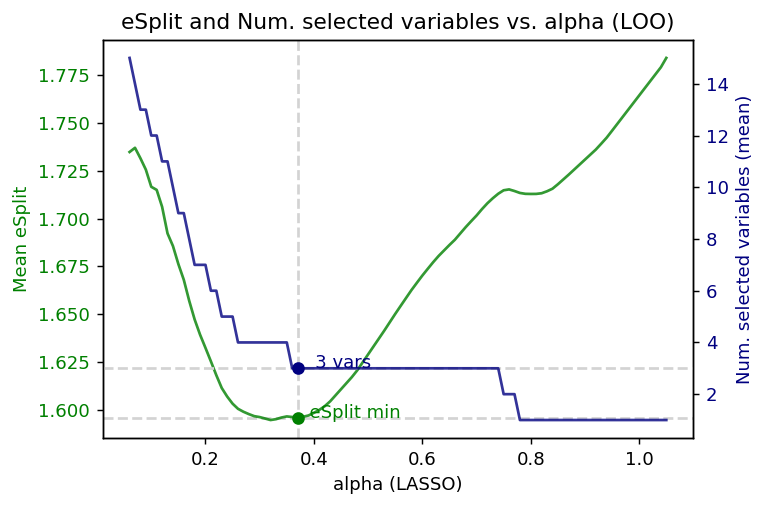

In [22]:
"""
    Shows the results of the optimization graphically
"""

fig, ax1 = plt.subplots()
plt.axvline(x=alpha_min, color='lightgray', linestyle='--')
ax1.axhline(y=eSplit_min, color='lightgray', linestyle='--')
ax1.set_title('eSplit and Num. selected variables vs. alpha (LOO)')
ax1.set_xlabel('alpha (LASSO)')
ax1.set_ylabel('Mean eSplit', color='green')
ax1.plot(alpha, eSplitMean, alpha=0.8, color='green')
ax1.plot(alpha_min, eSplit_min,'o', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.text(alpha_min, eSplit_min,'  eSplit min', color='green')
ax2 = ax1.twinx()
ax2.axhline(y=NumVarSelect_min, color='lightgray', linestyle='--')
ax2.set_ylabel('Num. selected variables (mean)', color='navy')  
ax2.plot(alpha, NumVarSelectMean, alpha=0.8, color='navy')
ax2.plot(alpha_min, NumVarSelect_min,'o', color='navy')
ax2.text(alpha_min, NumVarSelect_min,'   3 vars', color='navy')
ax2.tick_params(axis='y', labelcolor='navy')
fig.tight_layout()  
plt.show()

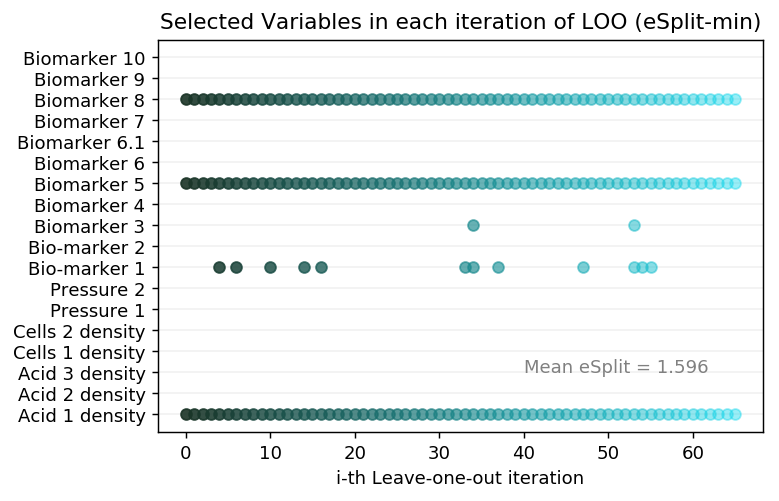

In [23]:
"""
    Analysis of the stability of the selected variables.
    Shows graphically which variables are selected in each iteration, 
    for the alpha value that produces the minimum eSplit.
"""

plt.figure()

for i in range(len(listColNames)):
    plt.axhline(y=i, color='gray', linewidth=0.1)
    
for j in range(66):
    selVars = np.where(Beta[np.where(eSplitMean == eSplit_min)[0].tolist()[0]][j] != 0)
    plt.plot(np.ones(np.size(selVars))*j, selVars[0], 'o', color=(0.1, 0.2+0.01*j, 0.15+0.012*j), alpha=0.9-0.007*j)
    
plt.title('Selected Variables in each iteration of LOO (eSplit-min)')
plt.xlabel('i-th Leave-one-out iteration')
plt.yticks(np.arange(len(listColNames)), listColNames)
plt.text(40,2,'Mean eSplit = ' + str(round(eSplit_min,3)), color='gray');

<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> En regardant le graphique au dessus, on conclut que la la sélection des variables semble stable. Les 3 variables qui pŕedisent mieux 'Disease Progression' sont 'Biomarker 8', 'Biomarker 5' et 'Acid 1 Density'. Cependant, la variable 'Biomarker 1' est aussi sélectionée dans quelques itérations du méthode Leave-one-out.
</div>

## Question 5 :   
On s'interesse enfin au fichier 'MedicalData2.csv' et non 'MedicalData1.csv' qui contient une colonne qualitative supplementaire 'Pathology type'.


## Question 5.1 : 
Quelles sont les differences entre les structures du fichier 'MedicalData2.csv' et du fichier 'MedicalData1.csv' en plus de cette colonne supplementaire


<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> Les decimals sont maintenant '.' au lieu de ',' et les donnés sont separées avec ',' au lieu de ';'.
</div>

## Question 5.2 : 
Est-ce qu'une variable semble bien expliquer la classe de 'Pathology type'. Quelle demarche vous semble la plus pertinente pour identifer cette variable ?

<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> Comme cette fois-ci l'on a une variable qualitative - 'Pathology' à deux groupes - Pathologie = 1 ou Pathologie = 2, il va falloir avoir un modèle qui prenne cela en compte. Tout d'abord je commence par étudier la prédiction de la variable 'Pathology' à l'aide d'une Regression Logistique faite en utilisant la matrice X complète. Ce que je trouve c'est que c'est possible de faire un fit logistique parfait.
</div>

In [24]:
"""
    Reads and prepares the new data frame
"""

dataframe=pandas.read_csv("./MedicalData2.csv",sep=',',decimal=b'.')

listColNames=list(dataframe.columns)

XY=dataframe.values
ColNb_Y=listColNames.index('Pathology type')

#reshape is to make sure that Y is a column vector
Y=XY[:,ColNb_Y].reshape((XY.shape[0],1))   
X = np.delete(XY, ColNb_Y, 1)

X_scaled = preprocessing.scale(X)

#to make it contain the column names of X only
listColNames.pop(ColNb_Y);     

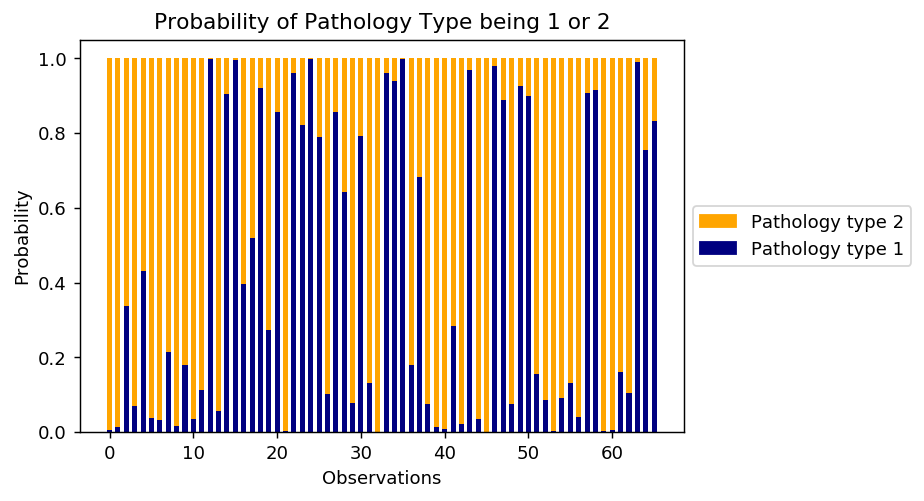

In [25]:
# Find the probability of each pathology type for each observation from 1 ... to n=66
logReg = LogisticRegression(penalty='l2')
logReg.fit(X_scaled,Y.reshape(n_lines,))
prob = logReg.predict_proba(X_scaled)

# Plots the probability
width = 0.6
plt.bar(np.arange(0,66), prob[:,0], width, color='navy')
plt.bar(np.arange(0,66), prob[:,1], width, bottom=prob[:,0], color='orange')
plt.title('Probability of Pathology Type being 1 or 2')
orange_patch = mpatches.Patch(color='orange', label='Pathology type 2')
blue_patch = mpatches.Patch(color='navy', label='Pathology type 1')
plt.legend(handles=[orange_patch, blue_patch], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Observations')
plt.ylabel('Probability')
plt.show()

<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> La plupart des probabilités semblent être soit près de 0 soit près de l'unité.
</div>

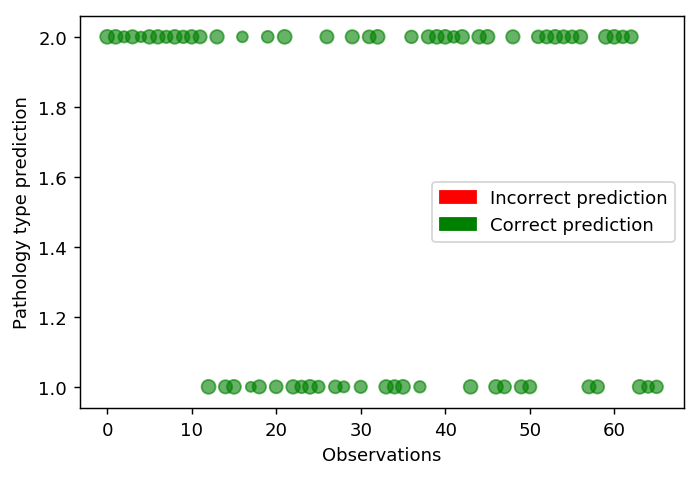

In [26]:
"""
    Plots the predictions and calculates the prediction 
    error to implement color-mapping (red and green) to 
    distinguish between good and bad predictions.
"""
# calculates the error in each prediction
err = np.abs(np.subtract(logReg.predict(X_scaled).reshape(-1,1), Y))

# marker size with a radius proportional to the prediction probability
s = []
for i in range(n_lines):
    if prob[i,1] >= 0.5:
        s.append(60*prob[i,1])
    else:
        s.append(60*prob[i,0])

# defines a color vector, green when error = 0 and red when error = 1
color = ['green', 'red']
color = [color[int(i)] for i in err]

# Plots predictions with color mapping for correct and incorrect
plt.scatter(np.arange(66), logReg.predict(X_scaled), s=s, c=color, alpha=0.6)
plt.xlabel('Observations')
plt.ylabel('Pathology type prediction')
red_patch = mpatches.Patch(color='red', label='Incorrect prediction')
blue_patch = mpatches.Patch(color='green', label='Correct prediction')
plt.legend(handles=[red_patch, blue_patch]);

In [27]:
numErrors = np.sum(err == 1)
errorRate = (numErrors / n_lines)
print('> Logistic Regression prediction completed with %d errors.' % numErrors)
print('> Corresponds to an error rate of %.2f.' % errorRate)

> Logistic Regression prediction completed with 0 errors.
> Corresponds to an error rate of 0.00.


<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> En suite, et comme l'on veut savoir si c'est possible de déterminer 'Pathology Type' à l'aide d'une seule variable, je vais optimiser ce que je viens de faire. Je utilise ci-dessous une optimisation avec une pénalisation L1 pour sélectionnner la variable avec le minimum eSplit pour le méthode Leave-One-Out. Donc, pareil à ce que j'ai fait pour déterminer les 3 variables préditives pour la regression linéaire avec LASSO.
</div>

In [28]:
"""
    Performs a logistic regression using L1 penalty
    and plots the predicted probability of the 
    pathology being type 1 or 2.
"""

# Logistic Regression for multiple penalty factors. The lower the alpha, the greater the regularisation
alpha = [0.001+0.002*i for i in range(1, 100)]
[eSplit, NumVarSelect, Beta] = optimizeSelection(X_scaled,Y.reshape(n_lines,), alpha, method='log')

"""
    Calculates the average eSplit for each alpha and the 
    average number of selected variables for each alpha.
"""

eSplitMean = np.mean(eSplit, axis=1)
NumVarSelectMean = np.round(np.mean(NumVarSelect, axis=1))

"""
    Finds the minimum eSplit that verifies number of selected variables = 1,
    the corresponding alpha and the actual number of selected variables.
"""

# find the minimum eSplit with max 1 vars selected
eSplit_min = np.min(eSplitMean[np.where(NumVarSelectMean==1)])

# find the alpha that generates the lowest eSplit for 1 var selected
alpha_min = alpha[np.where(eSplitMean == eSplit_min)[0].tolist()[0]]

# find the number of variables satisfying: number of selected vars = 1 and lowest eSplit
NumVarSelect_min = NumVarSelectMean[np.where(eSplitMean == eSplit_min)[0].tolist()[0]]


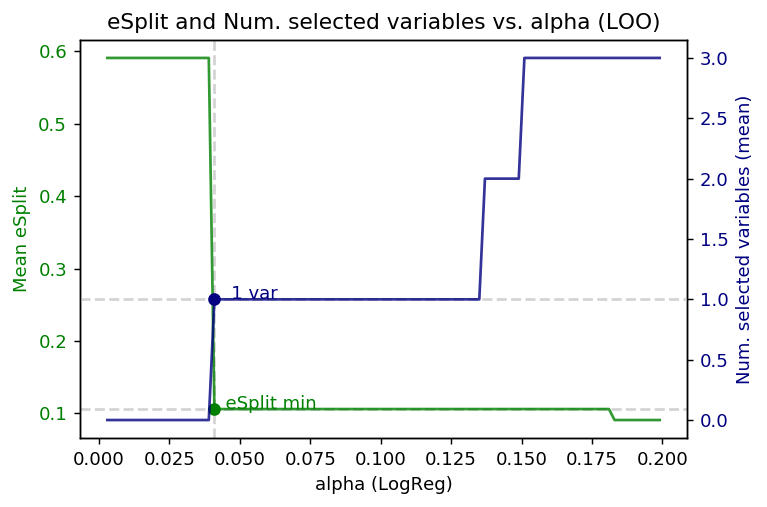

In [29]:
"""
    Shows the results of the optimization graphically.
"""

fig, ax1 = plt.subplots()
plt.axvline(x=alpha_min, color='lightgray', linestyle='--')
ax1.axhline(y=eSplit_min, color='lightgray', linestyle='--')
ax1.set_title('eSplit and Num. selected variables vs. alpha (LOO)')
ax1.set_xlabel('alpha (LogReg)')
ax1.set_ylabel('Mean eSplit', color='green')
ax1.plot(alpha, eSplitMean, alpha=0.8, color='green')
ax1.plot(alpha_min, eSplit_min,'o', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.text(alpha_min, eSplit_min,'  eSplit min', color='green')
ax2 = ax1.twinx()
ax2.axhline(y=NumVarSelect_min, color='lightgray', linestyle='--')
ax2.set_ylabel('Num. selected variables (mean)', color='navy')  
ax2.plot(alpha, NumVarSelectMean, alpha=0.8, color='navy')
ax2.plot(alpha_min, NumVarSelect_min,'o', color='navy')
ax2.text(alpha_min, NumVarSelect_min,'   1 var', color='navy')
ax2.tick_params(axis='y', labelcolor='navy')
fig.tight_layout()  
plt.show()

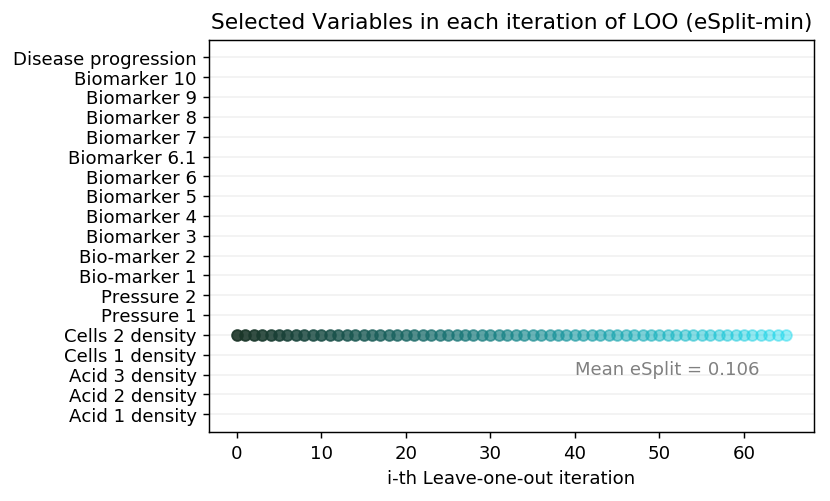

In [30]:
"""
    Analysis of the stability of the selected variables.
    Shows graphically which variables are selected in each iteration, 
    for the alpha value that produces the minimum eSplit.
"""

plt.figure()

for i in range(len(listColNames)):
    plt.axhline(y=i, color='gray', linewidth=0.1)
    
for j in range(66):
    selVars = np.where(Beta[np.where(eSplitMean == eSplit_min)[0].tolist()[0]][j] != 0)
    plt.plot(np.ones(np.size(selVars))*j, selVars[0], 'o', color=(0.1, 0.2+0.01*j, 0.15+0.012*j), alpha=0.9-0.007*j)
    
plt.title('Selected Variables in each iteration of LOO (eSplit-min)')
plt.xlabel('i-th Leave-one-out iteration')
plt.yticks(np.arange(len(listColNames)), listColNames)
plt.text(40,2,'Mean eSplit = ' + str(round(eSplit_min,3)), color='gray');

<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> On peut donc conclure que la variable 'Cells 2 density' permet de prédire 'Pathology Type'. Pour meilleur comprendre pourquoi j'ai tracé, ci-dessous, chaque variable avec un color-mapping correspondent à 'Pathology Type'.
</div>

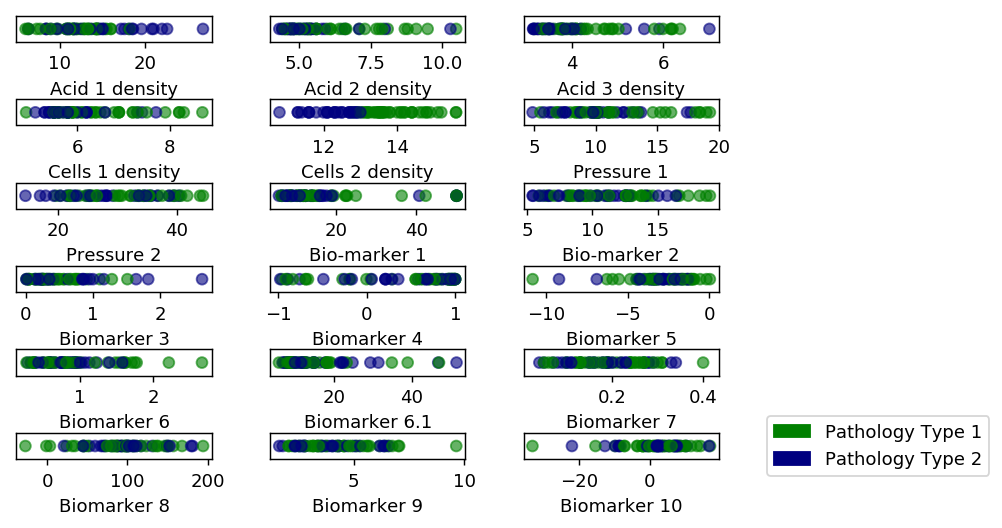

In [31]:
"""
    Plots every variable 1...18 with color mapping to Pathology 
    type 1 and Pathology type 2 to identify if Cells 2 density 
    is in fact linked to the pathology type.
"""

f, ax = plt.subplots(nrows = 6, ncols = 3)
f.tight_layout()

green_patch = mpatches.Patch(color='green', label='Pathology Type 1')
blue_patch = mpatches.Patch(color='navy', label='Pathology Type 2')
plt.legend(handles=[green_patch, blue_patch], loc='center left', bbox_to_anchor=(1.2, 0.5));

for index in range(n_col):
    ColNb_Var = index
    c = []
    for i in range(n_lines):
        if Y[i] == 1:
            c.append('navy')
        else:
            c.append('green')
    j = int(ColNb_Var % 3)
    i = int(np.trunc(ColNb_Var / 3))
    ax[i][j].scatter(X[:,ColNb_Var].reshape(1,-1), np.zeros_like(X[:,ColNb_Var].reshape(1,-1)), c=c, alpha=0.6)
    ax[i][j].set_xlabel(listColNames[ColNb_Var])
    ax[i][j].get_yaxis().set_ticks([])

<div class="alert alert-warning" style="margin-top: 1em"><b>Réponse:</b> On voit bien que 'Cells 2 density' est la seule variable dont les valeurs sont liées à la pathologie. Voici le fit avec une seule variable.
</div>

In [32]:
"""
    Uses just 'Cells 2 density' to 
    perform the logistic regression.
"""

logReg = LogisticRegression()
logReg.fit(X_scaled[:,listColNames.index('Cells 2 density')].reshape(-1, 1),Y.reshape(n_lines,))
R = logReg.score(X_scaled[:,listColNames.index('Cells 2 density')].reshape(-1, 1),Y.reshape(n_lines,))
print('> Fit score = %.2f' % round(R,2))

> Fit score = 0.97


<class 'numpy.ndarray'>


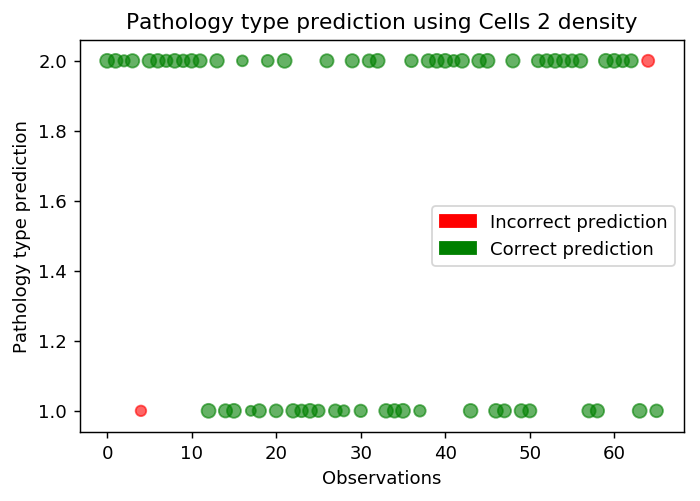

In [33]:
"""
    Plots the predictions and calculates the prediction 
    error to implement color-mapping (red and green) to 
    distringuish between good and bad predictions.
"""
# calculates the error in each prediction
err = np.abs(np.subtract(logReg.predict(X_scaled[:,listColNames.index('Cells 2 density')].reshape(-1, 1)), Y[:,0]))
print(type(logReg.predict(X_scaled[:,listColNames.index('Cells 2 density')].reshape(-1, 1))))

# marker size with a radius proportional to the prediction probability
s = []
for i in range(n_lines):
    if prob[i,1] >= 0.5:
        s.append(60*prob[i,1])
    else:
        s.append(60*prob[i,0])

# defines a color vector, green when error = 0 and red when error = 1
color = ['green', 'red']
color = [color[int(i)] for i in err]

# Plots predictions with color mapping for correct and incorrect
plt.scatter(np.arange(66), logReg.predict(X_scaled[:,listColNames.index('Cells 2 density')].reshape(-1, 1)), s=s, c=color, alpha=0.6)
plt.xlabel('Observations')
plt.ylabel('Pathology type prediction')
plt.title('Pathology type prediction using Cells 2 density')
red_patch = mpatches.Patch(color='red', label='Incorrect prediction')
green_patch = mpatches.Patch(color='green', label='Correct prediction')
plt.legend(handles=[red_patch, green_patch]);